# Python Notebook for analysing heart rate data

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import time
import datetime

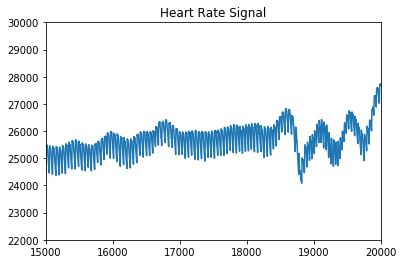

In [18]:
dataset = pd.read_csv('2018-01-30.csv')

plt.title('Heart Rate Signal') #the title of our heart rate plot
plt.ylim(22000, 30000)
plt.xlim(15000, 20000)
plt.plot(dataset['Red Signal']) #draw the plot object
plt.show() #display the plot object

In [16]:
def rolmean(dataset, hrw, samplingfreq):
    mov_avg = pd.rolling_mean(dataset['Red Signal'], window=int(hrw*samplingfreq))
    avg_hr = (np.mean(dataset['Red Signal']))
    mov_avg = [avg_hr if math.isnan(x) else x for x in mov_avg]
    #mov_avg = [x*1.2 for x in mov_avg]
    dataset['Red Signal_rollingmean'] = mov_avg

In [22]:
dataset = pd.read_csv('2018-01-30.csv')

#Calculating sampling frequency over the interval 15000:20000
unix_time = []
for x in dataset['Date']:
    dt = datetime.datetime.strptime(str(x), "%H:%M:%S.%f")
    us = dt.microsecond
    dt_struct = time.strptime(x, "%H:%M:%S.%f")
    unix_time.append(time.mktime(dt_struct) + (us / 1000000.0))
#samplingfreq = (len(unix_time) / (unix_time[-1] - unix_time[0]))
fs = (5000 / (unix_time[20000] - unix_time[15000]))

rolmean(dataset, 0.75, fs) 

#peaks will be detected by recording consistent RR intervals and adding to the peaklist simultaneously
window = []
peaklist = []
RR_list = []
listpos = 0
RR_interval = 0
prev_RR_interval = 0;

for datapoint in dataset['Red Signal']:
    rolling_avg = dataset['Red Signal_rollingmean'][listpos]
    if datapoint <= rolling_avg and len(window) < 1:
        listpos += 1
    elif datapoint > rolling_avg
        window.append(datapoint)
        listpos += 1
    else:
        peakpos = listpos - len(window) + (window.index(max(window)))
        if len(peaklist) >= 2 and prev_RR_interval
        peaklist.append(peakpos)
        window = []
        listpos += 1

SyntaxError: unexpected EOF while parsing (<ipython-input-22-743e2b3166bb>, line 19)